In [1]:
use "~/Dropbox/Working_Directory/Python/stat_models/Season_trend_decomposition/ausunemp.dta", clear

# line-plot of Y to determine whether an additive or a multiplicative decomposition appears to make the most sense

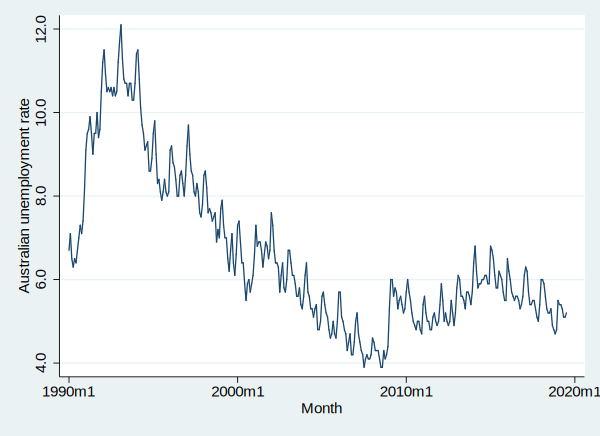

In [2]:
tsline unemp

# the seasonal/cyclical swings appear to be larger when unemployment is higher (especially early in the sample), so we apply a multiplicative decomposition

# first, add the data points that we want to create forecasts for

In [3]:
tsappend, add(60)
list in -1




     +----------------+
     |  month   unemp |
     |----------------|
415. | 2024m7       . |
     +----------------+


# Now let's remove noise. Firstly, let's compute $\mathrm{MA}_t$ to average out the noise

In [4]:
generate ma =(l6.unemp + l5.unemp + l4.unemp + l3.unemp + l2.unemp + l1.unemp + unemp + f1.unemp + f2.unemp + f3.unemp + f4.unemp + f5.unemp) / 12

list ma in 1/13


(71 missing values generated)


     +----------+
     |       ma |
     |----------|
  1. |        . |
  2. |        . |
  3. |        . |
  4. |        . |
  5. |        . |
     |----------|
  6. |        . |
  7. |    6.925 |
  8. |    7.125 |
  9. |    7.325 |
 10. | 7.583333 |
     |----------|
 11. | 7.883333 |
 12. | 8.133333 |
 13. |     8.35 |
     +----------+


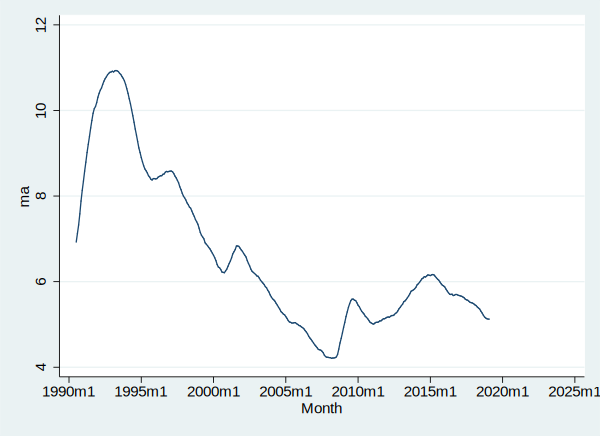

In [5]:
tsline ma

# compute $\mathrm{CMA}_t$

In [6]:
generate cma = (ma + f1.ma) / 2
list cma in 1/13


(72 missing values generated)


     +----------+
     |      cma |
     |----------|
  1. |        . |
  2. |        . |
  3. |        . |
  4. |        . |
  5. |        . |
     |----------|
  6. |        . |
  7. |    7.025 |
  8. |    7.225 |
  9. | 7.454166 |
 10. | 7.733334 |
     |----------|
 11. | 8.008333 |
 12. | 8.241667 |
 13. | 8.466667 |
     +----------+


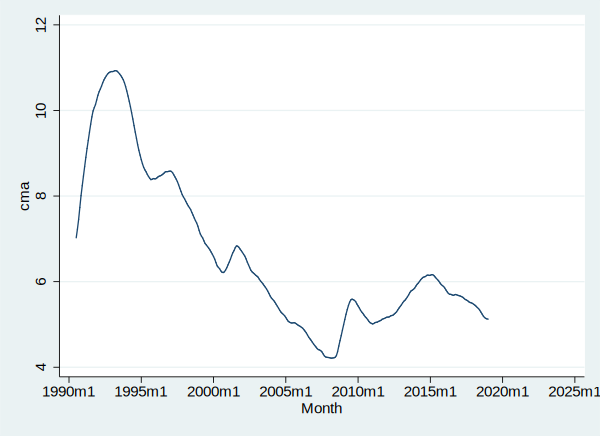

In [7]:
tsline cma

# compute $\frac{Y_t}{\mathrm{CMA}_t}$

In [8]:
generate y_over_cma = unemp / cma
list y_over_cma in 1/13


(72 missing values generated)


     +----------+
     | y_over~a |
     |----------|
  1. |        . |
  2. |        . |
  3. |        . |
  4. |        . |
  5. |        . |
     |----------|
  6. |        . |
  7. | .9537367 |
  8. | .9688581 |
  9. | .9793181 |
 10. | .9181034 |
     |----------|
 11. | .9240375 |
 12. | .9828109 |
 13. | 1.074803 |
     +----------+


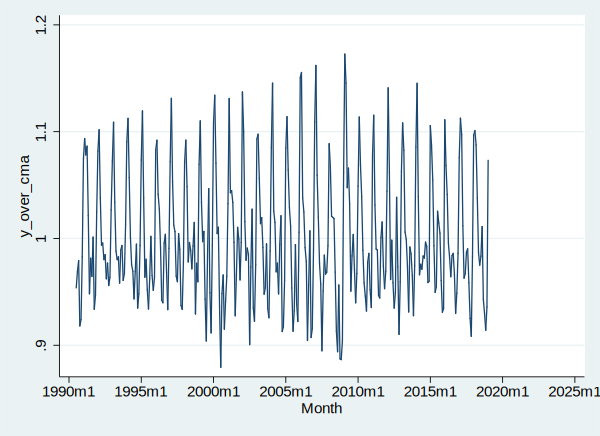

In [9]:
tsline y_over_cma

# after removing noise from unemp (which returns $\frac{Y_t}{\mathrm{CMA}_t}$), let's extract $\mathrm{SN}_t$ for $\frac{Y_t}{\mathrm{CMA}_t}$

In [10]:
generate monthnum = month(dofm(month))
quietly tabulate monthnum, gen(m)
regress y_over_cma m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12, noconstant





      Source |       SS           df       MS      Number of obs   =       343
-------------+----------------------------------   F(12, 331)      =  42019.39
       Model |  343.681665        12  28.6401387   Prob > F        =    0.0000
    Residual |  .225607427       331  .000681593   R-squared       =    0.9993
-------------+----------------------------------   Adj R-squared   =    0.9993
       Total |  343.907272       343  1.00264511   Root MSE        =    .02611

------------------------------------------------------------------------------
  y_over_cma |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          m1 |   1.083478    .004848   223.49   0.000     1.073941    1.093015
          m2 |   1.115468   .0049338   226.09   0.000     1.105763    1.125174
          m3 |   1.054478   .0049338   213.72   0.000     1.044772    1.064183
          m4 |   1.008868   .0049338   204.48  

# compute the estimated seasonal component

In [11]:
predict snbar
list snbar in 1/13


(option xb assumed; fitted values)


     +----------+
     |    snbar |
     |----------|
  1. | 1.083478 |
  2. | 1.115468 |
  3. | 1.054478 |
  4. | 1.008868 |
  5. | .9954858 |
     |----------|
  6. | .9684871 |
  7. | .9458792 |
  8. |  .972493 |
  9. | .9950271 |
 10. | .9467895 |
     |----------|
 11. |  .936576 |
 12. | .9762004 |
 13. | 1.083478 |
     +----------+


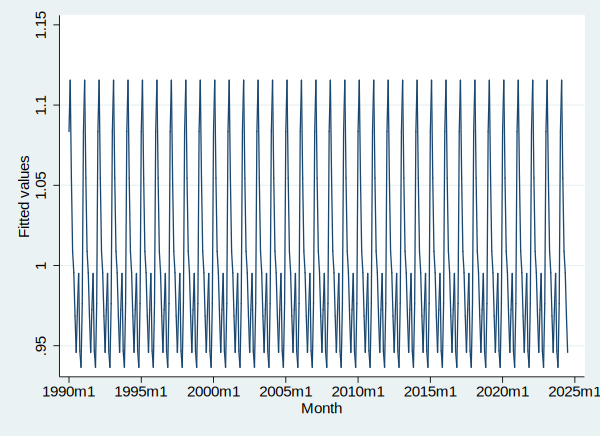

In [12]:
tsline snbar

# careful: the regression trick that we used during the lecture to find the mean of the snbar doesn't work here, because there are more Januaries-Julies than Augusts-Decembers in this data set. We can fix that by only regressing over the first year (or any year, really... or any period that includes equally many observations for each month)

In [13]:
regress snbar in 1/12


      Source |       SS           df       MS      Number of obs   =        12
-------------+----------------------------------   F(0, 11)        =      0.00
       Model |           0         0           .   Prob > F        =         .
    Residual |  .035492185        11  .003226562   R-squared       =    0.0000
-------------+----------------------------------   Adj R-squared   =    0.0000
       Total |  .035492185        11  .003226562   Root MSE        =     .0568

------------------------------------------------------------------------------
       snbar |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       _cons |   .9999359   .0163976    60.98   0.000     .9638451    1.036027
------------------------------------------------------------------------------


In [14]:
predict snbarconst
* note that, in my code, snbarconst is the average of snbar in the first 12 month, you can generalize it to first 24, 36 months whatsoever.
list snbarconst in 1/10


(option xb assumed; fitted values)


     +----------+
     | snbarc~t |
     |----------|
  1. | .9999359 |
  2. | .9999359 |
  3. | .9999359 |
  4. | .9999359 |
  5. | .9999359 |
     |----------|
  6. | .9999359 |
  7. | .9999359 |
  8. | .9999359 |
  9. | .9999359 |
 10. | .9999359 |
     +----------+


In [15]:
sum snbarconst


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  snbarconst |        415    .9999359           0   .9999359   .9999359


In [16]:
generate sn = snbar/snbarconst
list sn in 1/10




     +----------+
     |       sn |
     |----------|
  1. | 1.083548 |
  2. |  1.11554 |
  3. | 1.054545 |
  4. | 1.008933 |
  5. | .9955497 |
     |----------|
  6. | .9685492 |
  7. | .9459399 |
  8. | .9725553 |
  9. |  .995091 |
 10. | .9468502 |
     +----------+


# the deseasonalised data seem to broadly follow an up-down-up-down pattern, so a polynomial could be a sensible trend specification

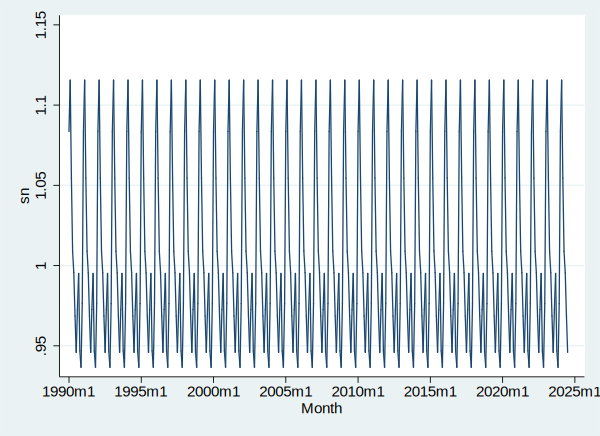

In [17]:
tsline sn

# now let's remove $SN_t$ from unemp and generate $d_t$

In [18]:
generate d=unemp/sn
list d in 1/20


(60 missing values generated)


     +----------+
     |        d |
     |----------|
  1. | 6.183393 |
  2. | 6.364631 |
  3. | 6.163795 |
  4. | 6.244221 |
  5. | 6.529057 |
     |----------|
  6. | 6.607821 |
  7. | 7.082902 |
  8. | 7.197534 |
  9. | 7.336013 |
 10. | 7.498546 |
     |----------|
 11. | 7.900614 |
 12. | 8.296945 |
 13. | 8.398339 |
 14. | 8.516056 |
 15. | 9.103451 |
     |----------|
 16. | 9.812348 |
 17. | 9.542467 |
 18. | 9.292249 |
 19. | 10.04292 |
 20. | 9.768082 |
     +----------+


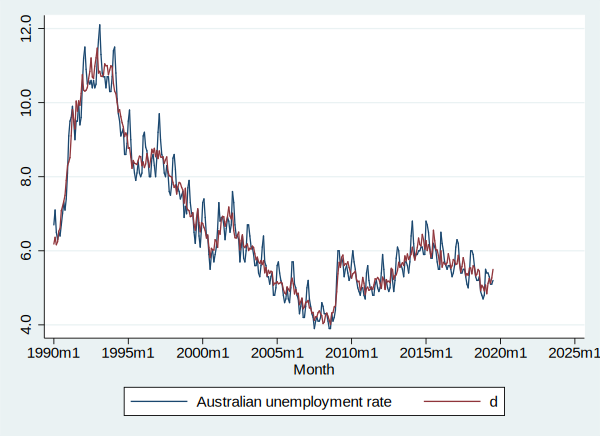

In [19]:
tsline unemp d

# now let's use polynomial of time to extract the trend component

In [20]:
generate t  = _n
generate t2 = t  * t
generate t3 = t2 * t
generate t4 = t2 * t2

list t t2 t3 t4 in 1/10







     +-------------------------+
     |  t    t2     t3      t4 |
     |-------------------------|
  1. |  1     1      1       1 |
  2. |  2     4      8      16 |
  3. |  3     9     27      81 |
  4. |  4    16     64     256 |
  5. |  5    25    125     625 |
     |-------------------------|
  6. |  6    36    216    1296 |
  7. |  7    49    343    2401 |
  8. |  8    64    512    4096 |
  9. |  9    81    729    6561 |
 10. | 10   100   1000   10000 |
     +-------------------------+


In [21]:
regress d t t2 t3 t4


      Source |       SS           df       MS      Number of obs   =       355
-------------+----------------------------------   F(4, 350)       =    770.67
       Model |  1076.62872         4  269.157179   Prob > F        =    0.0000
    Residual |  122.237825       350  .349250929   R-squared       =    0.8980
-------------+----------------------------------   Adj R-squared   =    0.8969
       Total |  1198.86654       354  3.38662865   Root MSE        =    .59097

------------------------------------------------------------------------------
           d |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           t |   .1080533   .0061902    17.46   0.000     .0958786     .120228
          t2 |  -.0016315   .0000706   -23.12   0.000    -.0017703   -.0014927
          t3 |   6.94e-06   2.98e-07    23.32   0.000     6.36e-06    7.53e-06
          t4 |  -9.21e-09   4.15e-10   -22.21   0.

# the predicted value of the regression is $TR_t$

In [22]:
predict tr
list tr in 1/10


(option xb assumed; fitted values)


     +----------+
     |       tr |
     |----------|
  1. | 7.702672 |
  2. |  7.80588 |
  3. | 7.905907 |
  4. | 8.002794 |
  5. | 8.096584 |
     |----------|
  6. | 8.187317 |
  7. | 8.275032 |
  8. |  8.35977 |
  9. | 8.441571 |
 10. | 8.520475 |
     +----------+


# let's see if that makes sense

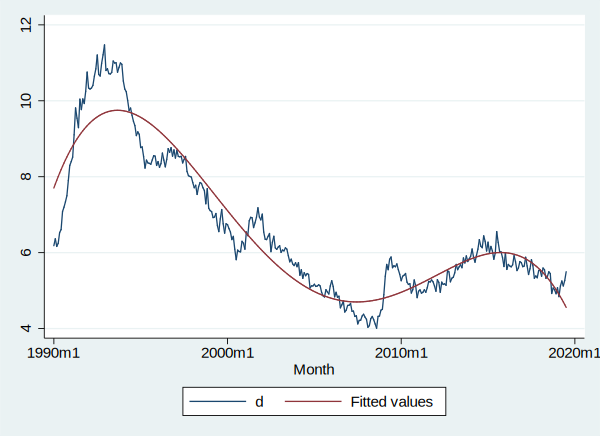

In [23]:
tsline d tr if unemp~=.

# looks decent. not perfectly fitting the early 1990s unemployment peak, but maybe we can attribute the difference to a cyclical swing. we could add yet another power to that polynomial... but four is already feeling uncomfortably large

# Now let's compute $TR_t \cdot SN_t$

In [24]:
generate trsn=tr*sn
list trsn in 1/10




     +----------+
     |     trsn |
     |----------|
  1. | 8.346212 |
  2. |  8.70777 |
  3. | 8.337135 |
  4. | 8.074282 |
  5. | 8.060552 |
     |----------|
  6. | 7.929819 |
  7. | 7.827683 |
  8. | 8.130339 |
  9. | 8.400131 |
 10. | 8.067615 |
     +----------+


# get the standard errors for these forecasts and construct the prediction interval of $TR_t \cdot SN_t$

In [25]:
predict se, stdf
generate trsn_lo=trsn-invttail(355-5,0.025)*se
generate trsn_hi=trsn+invttail(355-5,0.025)*se
list se trsn_lo trsn_hi in 1/10






     +--------------------------------+
     |       se    trsn_lo    trsn_hi |
     |--------------------------------|
  1. | .6107643   7.144982   9.547442 |
  2. | .6094873   7.509052   9.906488 |
  3. | .6082898   7.140772   9.533499 |
  4. | .6071681   6.880125   9.268438 |
  5. | .6061187   6.868459   9.252645 |
     |--------------------------------|
  6. | .6051383   6.739654   9.119984 |
  7. | .6042234   6.639318   9.016048 |
  8. |  .603371    6.94365   9.317027 |
  9. | .6025777   7.215003    9.58526 |
 10. | .6018406   6.883935   9.251293 |
     +--------------------------------+


In [26]:
list se trsn_lo trsn_hi in 400/415


     +----------------------------------+
     |       se     trsn_lo     trsn_hi |
     |----------------------------------|
400. | .8216079   -3.477949   -.2461298 |
401. |  .831336   -3.697485   -.4273995 |
402. | .8413457   -3.884401   -.5749424 |
403. | .8516417   -4.074728   -.7247697 |
404. | .8622264   -4.395756   -1.004163 |
     |----------------------------------|
405. |  .873103   -4.722265   -1.287888 |
406. | .8842732   -4.833605    -1.35529 |
407. | .8957411   -5.059603   -1.536179 |
408. |  .907509   -5.473638   -1.903924 |
409. | .9195791   -6.186793   -2.569601 |
     |----------------------------------|
410. | .9319543   -6.638102   -2.972232 |
411. | .9446377   -6.686801    -2.97104 |
412. | .9576294    -6.78239   -3.015526 |
413. | .9709334   -7.023633   -3.204437 |
414. | .9845534   -7.189003   -3.316233 |
     |----------------------------------|
415. | .9984885   -7.369256   -3.441671 |
     +----------------------------------+


# now let's compute $CL_t \cdot IR_t$ and isolate $IR$ from $CL$ by using moving average again. Finally, let's compute $TR_t \cdot CL_t \cdot SN_t$

In [27]:
generate clir   = d/tr
generate cl     = (l1.clir+clir+f1.clir)/3
replace  cl     = (2*clir+f1.clir)/3 in 1
replace  cl     = (l1.clir+2*clir)/3 in 355
replace  cl     = 1 if unemp==.
generate ir     = clir/cl
generate trsncl = trsn*cl


(60 missing values generated)

(62 missing values generated)

(1 real change made)

(1 real change made)

(60 real changes made)

(60 missing values generated)



In [28]:
list clir cl ir trsncl in 1/10


     +-------------------------------------------+
     |     clir         cl         ir     trsncl |
     |-------------------------------------------|
  1. | .8027593   .8069608   .9947935   6.735066 |
  2. | .8153638   .7992558   1.020154   6.959736 |
  3. | .7796443   .7917544   .9847047   6.600964 |
  4. | .7802551   .7887653   .9892108   6.368713 |
  5. | .8063964   .7979106   1.010635   6.431599 |
     |-------------------------------------------|
  6. | .8070802   .8231377   .9804924   6.527333 |
  7. | .8559365   .8413298   1.017361   6.585663 |
  8. | .8609728   .8619811   .9988302   7.008198 |
  9. | .8690341   .8700229   .9988635   7.308307 |
 10. | .8800619   .8893812   .9895216   7.175185 |
     +-------------------------------------------+


# now let's plot everything and check if it works

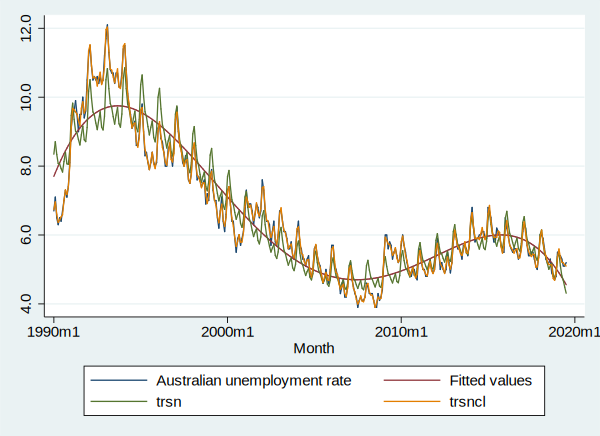

In [29]:
tsline unemp tr trsn trsncl if unemp~=.

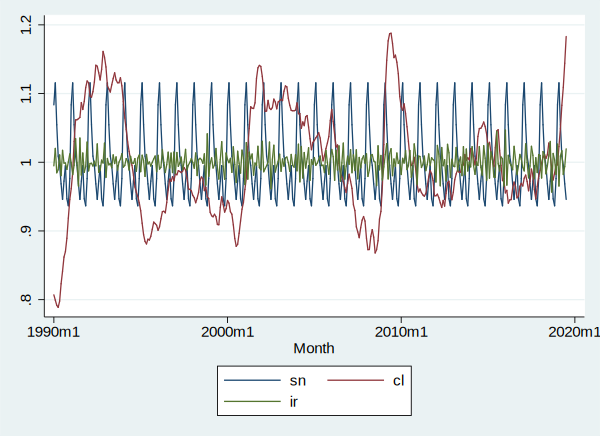

In [30]:
tsline sn cl ir if unemp~=.

# everything looks pretty reasonable. Let's plot the prediction interval

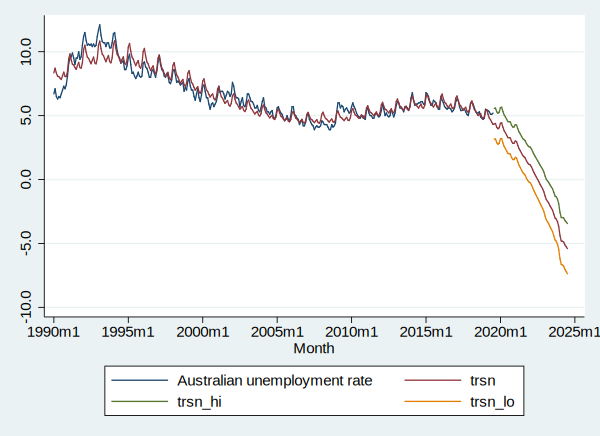

In [31]:
twoway (tsline unemp trsn) (tsline trsn_hi trsn_lo if unemp==.)